The first cells here are required to make the notebooks work without any installation in a browser. A normal notebook running on your personal machine would start later.

In [ ]:
%pip install ipyaladin
%pip install sidecar

In [ ]:
import micropip, http.client, pyodide_http
await micropip.install(["ssl","https://files.pythonhosted.org/packages/c3/c8/d74794dff5c6802994d3dfe506d691d9e0ff3e6b2f34df577899685b2617/astroquery-0.4.7.dev9008-py3-none-any.whl",
                        "https://rawcdn.githack.com/cds-astro/jupyterlite/88f05119a3c0f6c37c0c5475666d4bd9e0bd8a69/content/pyodide/wheels/cdshealpix-0.6.5-cp311-cp311-emscripten_3_1_45_wasm32.whl",
                        "https://rawcdn.githack.com/cds-astro/jupyterlite/88f05119a3c0f6c37c0c5475666d4bd9e0bd8a69/content/pyodide/wheels/mocpy-0.13.1-cp311-cp311-emscripten_3_1_45_wasm32.whl"])
pyodide_http.patch_all()
from importlib import reload
reload(http.client);

Here is the true beginning of the story.

# Introduction to ipyaladin
(and VizieR and MOCs)

In [12]:
from ipyaladin import Aladin
from sidecar import Sidecar
from astroquery.vizier import Vizier
from mocpy import MOC

In [5]:
sidecar = Sidecar(title='aladin')
aladin = Aladin(fov=200, target='galactic center', height=1000)
with sidecar:
    display(aladin)

In [ ]:
aladin.target = "M51"

## 1. Let's find the catalog identifier of DESI legacy survey in Vizier

In [15]:
list_catalogs = Vizier.find_catalogs(["Dark Energy Survey", "Data Release 2"])
[print(catalog, description.description) for catalog, description in list_catalogs.items()];

II/371 The Dark Energy Survey (DES): Data Release 2 (Abbott+, 2021)
J/ApJS/264/9 Southern phot. quasars from DES DR2 & NIR surveys (Yang+, 2023)


The identifier is `II/371`

In [10]:
catalog = "II/371"

## 2. A glimpse at its coverage

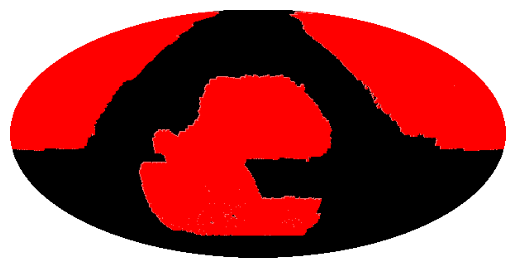

In [14]:
catalog_coverage = MOC.from_fits(f"https://cdsarc.cds.unistra.fr/viz-bin/moc/{catalog}")

In [ ]:
aladin.add_moc_from_dict()

The identifier is `VII/192`. 

## 2. Let's query for sources from DESI in a cone around a point in the sky

We'll look at how to do that with the Vizier class in astroquery.

## 3. get it into ipyaladin

We load the widget around the desired position first. The following cell adds the table to the view.